In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:

df.groupby('sex')['tip'].value_counts()


C:\Users\Iftikhar Ahmad\AppData\Local\Temp\ipykernel_7496\3292076565.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].value_counts()


sex     tip  
Male    2.00     22
        3.00     16
        4.00      9
        5.00      6
        1.50      5
                 ..
Female  6.70      0
        6.73      0
        7.58      0
        9.00      0
        10.00     0
Name: count, Length: 246, dtype: int64

In [3]:
df=df.sort_values(by='total_bill',ascending=False)
df.head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [4]:
x = df[['total_bill']]

y = df['tip']


In [5]:
scaler = MinMaxScaler()
nb = scaler.fit_transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [7]:


# Instantiate the scaler
#scaler = MinMaxScaler()  # Notice the parentheses

 #Fit to the training data and transform it
#x_train = scaler.fit_transform(x_train)

# Apply the same transformation to the test data
#x_test = scaler.transform(x_test)




In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
model.predict([[50]])


d:\mini\envs\py35\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.22815407])

In [10]:
y_pred = model.predict(x_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)

MSE: 1.0633495142057467
R2: 0.37773056192459176


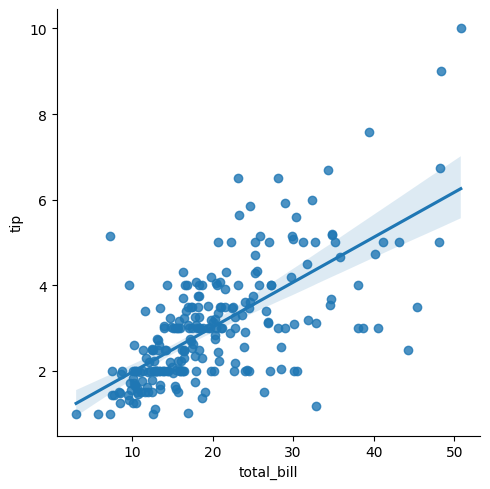

In [12]:
sns.lmplot(x='total_bill', y='tip', data=df)
plt.show()

In [13]:
import pickle
pickle.dump(model,open('hi/md1.pk1','wb'))

In [14]:
import pickle
model_load=pickle.load(open('hi/md1.pk1','rb'))